In [1]:
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linalg as LA
import math

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

In [2]:
a_1 = [2,1]
a_2 = [4,3]
a_3 = [7,10]
a_4 = [9,13]
cov = np.array([[2,1],[1,2]])

In [3]:
X_1 = np.random.multivariate_normal(a_1, 1 * cov, 1000)
X_2 = np.random.multivariate_normal(a_2, 0.7 * cov, 500)
X_3 = np.random.multivariate_normal(a_3, cov, 200)
X_4 = np.random.multivariate_normal(a_4, cov, 100)

X = np.concatenate((X_1, X_2, X_3, X_4), axis=0)

In [4]:
# hyperparameters
h = 0.5
A = np.ones(len(X))
s = 0.6

def K(r): 
    return np.exp(-r ** 2 / 2)

def p(x,y):
    return K(LA.norm(x - y) / h)
    
def f(x):
    
    my_sum = 0
    
    for a_i, x_i in zip(A, X):
        my_sum += a_i*p(x,x_i)
        
    return my_sum

In [5]:
def GaussFit(y):
    
    c = f(y)
        
    z = 0
    for a_i, x_i in zip(A, X):
        z += a_i * p(y,x_i) * x_i
        
    z /= c 
    
    b = c / p(z, y)
    
    return lambda x : b * p(z, x)

In [6]:
def combined_gaussians(set_of_gaussians, x):
    
    max_val = 0
    for g in set_of_gaussians:
        max_val = max(max_val, g(x))
        
    return max_val

In [7]:
possible_landmarks = X
total_gaussians = []
prev_length = len(possible_landmarks) + 1
chosen_landmarks = []

while( len(possible_landmarks) > 0 ):
    print(len(total_gaussians), len(possible_landmarks))
    Y = [f(y) - combined_gaussians(total_gaussians, y) for y in possible_landmarks]
    y_k = possible_landmarks[np.argmax(Y)]
    chosen_landmarks.append(y_k)
    g_n =  GaussFit(y_k)
    total_gaussians.append(g_n)
    possible_landmarks = list(filter(lambda y : combined_gaussians(total_gaussians, y) < s*f(y), possible_landmarks))

0 1800
1 1689
2 1596
3 1506
4 1441
5 1377
6 1315
7 1251
8 1208
9 1150
10 1114
11 1064
12 1012
13 971
14 964
15 909
16 907
17 903
18 900
19 861
20 851
21 816
22 806
23 788
24 759
25 749
26 734
27 706
28 677
29 649
30 633
31 624
32 620
33 609
34 592
35 571
36 557
37 545
38 538
39 534
40 518
41 513
42 497
43 476
44 460
45 455
46 453
47 440
48 421
49 413
50 406
51 393
52 376
53 367
54 364
55 348
56 339
57 331
58 325
59 314
60 306
61 297
62 287
63 285
64 280
65 275
66 272
67 267
68 263
69 253
70 250
71 241
72 235
73 229
74 227
75 222
76 219
77 214
78 210
79 204
80 198
81 195
82 187
83 184
84 176
85 175
86 172
87 169
88 166
89 163
90 155
91 154
92 149
93 142
94 140
95 135
96 131
97 129
98 128
99 125
100 121
101 117
102 115
103 114
104 112
105 105
106 102
107 98
108 96
109 93
110 88
111 84
112 82
113 77
114 75
115 74
116 68
117 67
118 64
119 61
120 57
121 56
122 54
123 52
124 51
125 50
126 49
127 48
128 45
129 44
130 43
131 41
132 40
133 39
134 37
135 35
136 33
137 30
138 28
139 25
140 24
141

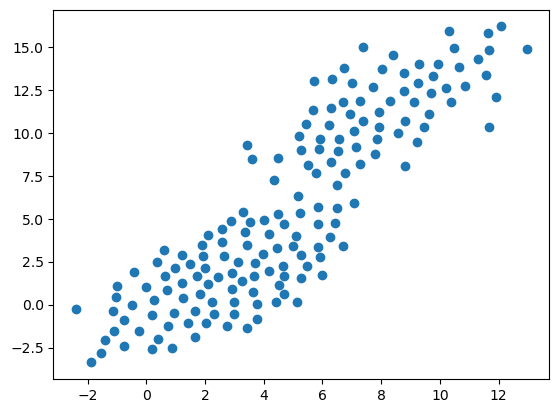

In [8]:
chosen_landmarks = np.array(chosen_landmarks)

plt.scatter(chosen_landmarks[:,0], chosen_landmarks[:,1])
plt.show()

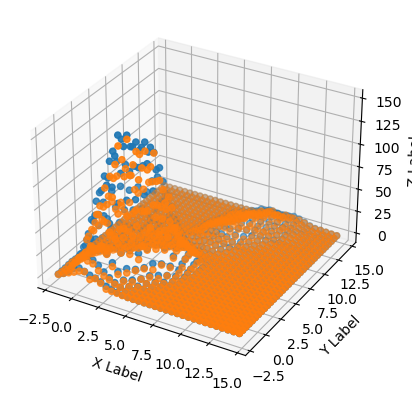

In [9]:
D = create_vector(-2,15,0.5)
D_X, D_Y = np.meshgrid(D, D)
D = np.stack([D_X.reshape(-1), D_Y.reshape(-1)]).T

Y = [f(x) for x in D] 
Y_approx = [combined_gaussians(total_gaussians, x) for x in D]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#%matplotlib notebook
ax.scatter(D[:,0], D[:,1], Y)
ax.scatter(D[:,0], D[:,1], Y_approx)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [10]:
# number of landmark points chosen
len(total_gaussians)

162